<a href="https://colab.research.google.com/github/shyguuy/lab/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd

df = pd.read_csv('cwurData.csv') # чтение файла
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [ ]:
df = df.dropna()
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


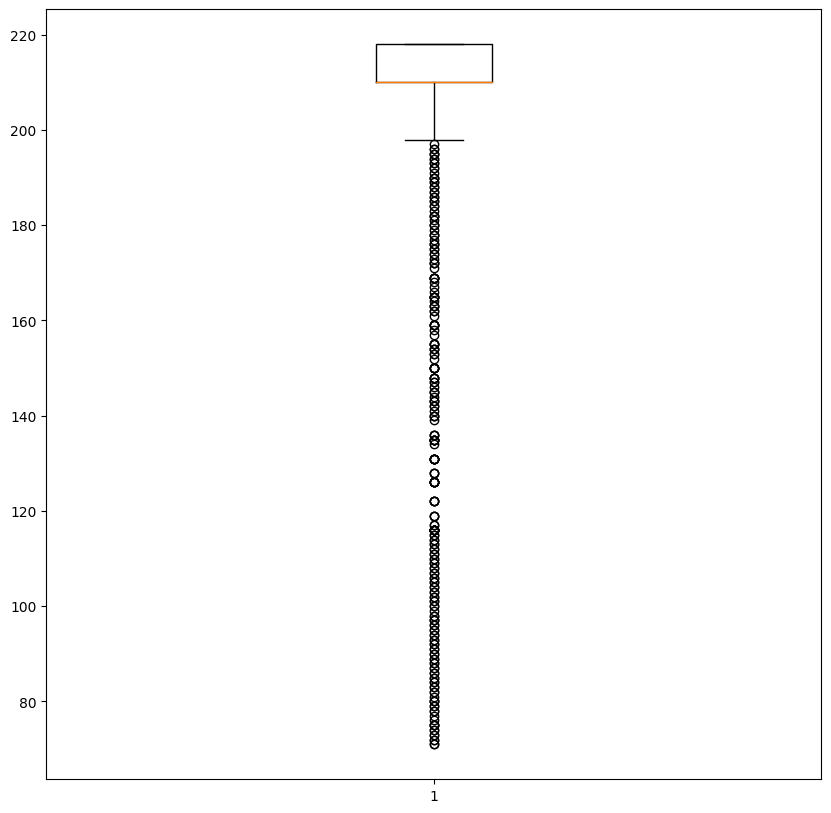

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
plt.boxplot(df['quality_of_faculty'])

plt.show()

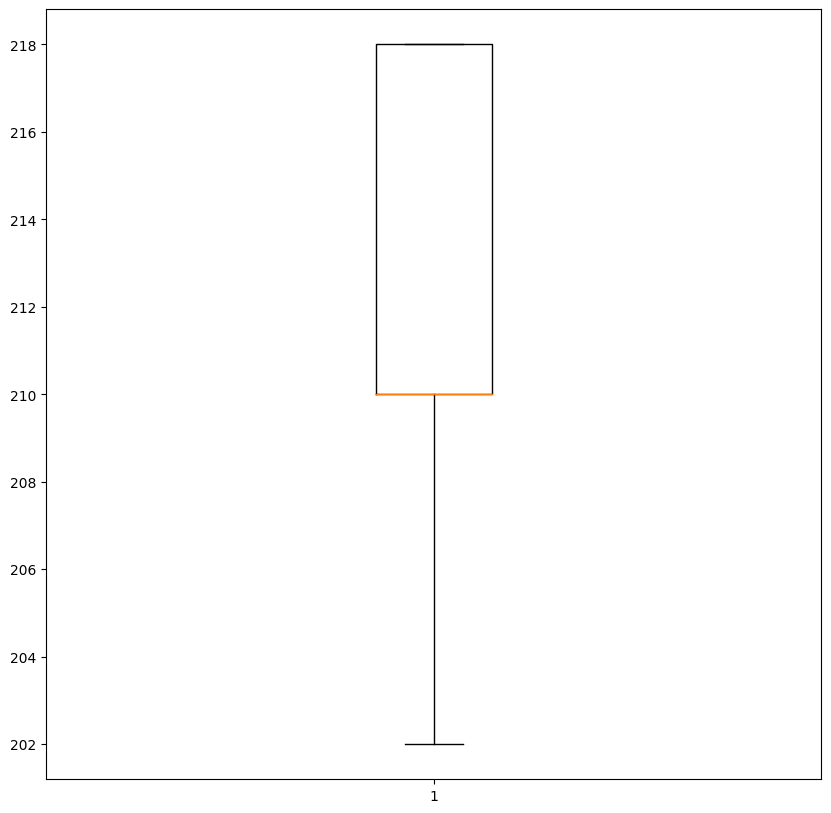

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
mean = df["quality_of_faculty"].mean()
std_deviation = df["quality_of_faculty"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["quality_of_faculty"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.quality_of_faculty.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['quality_of_faculty'])

plt.show()

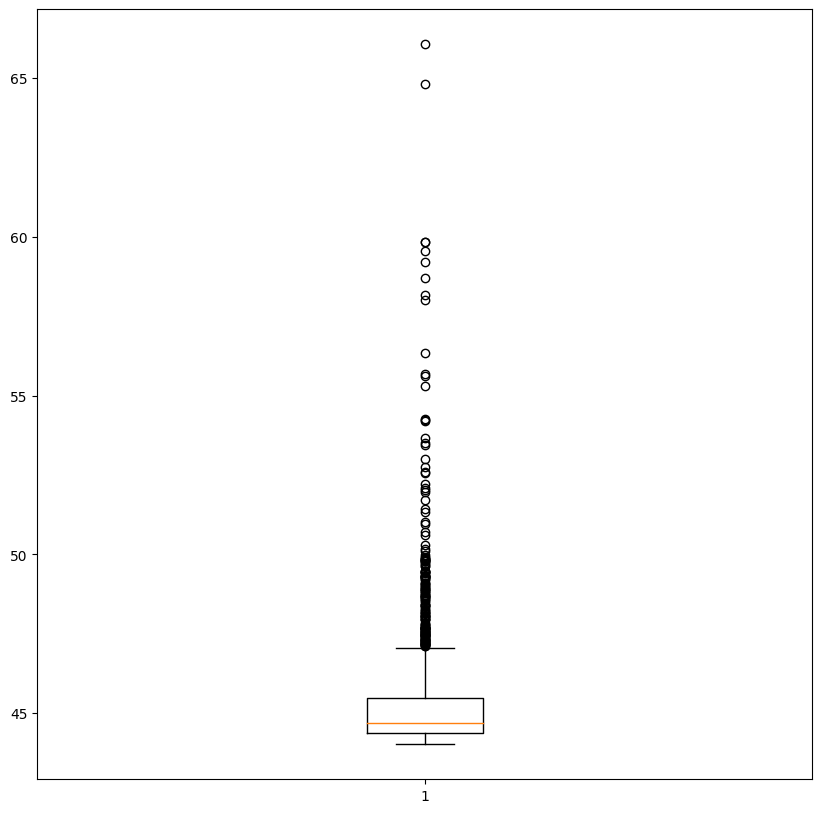

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
plt.boxplot(df['score'])

plt.show()

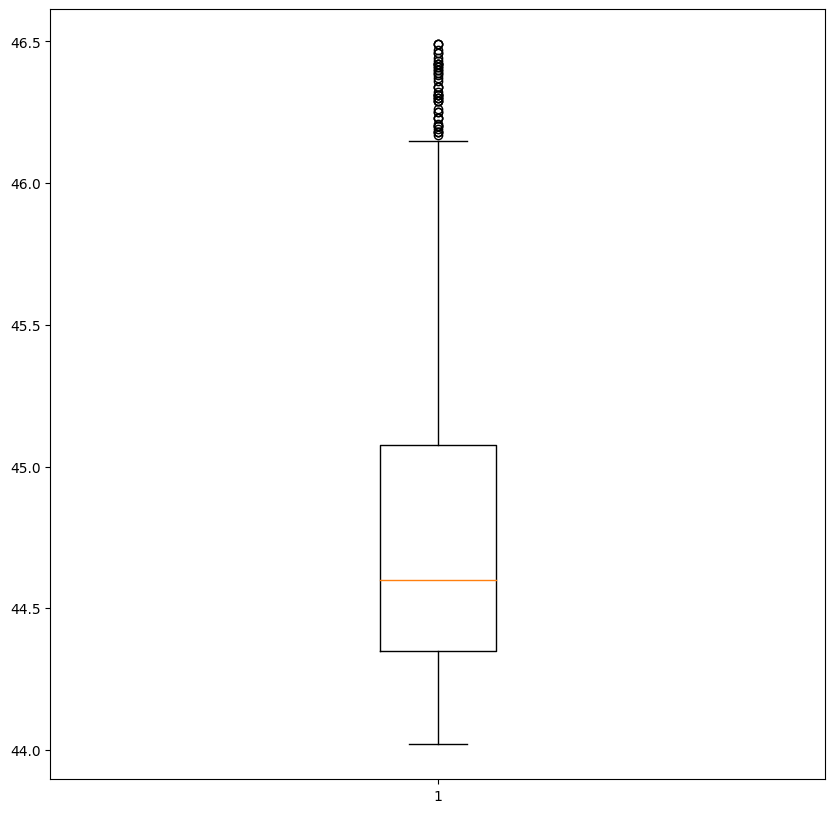

In [ ]:
mean = df["score"].mean()
std_deviation = df["score"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["score"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.score.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['score'])

plt.show()

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

df_cluster = df.copy()

###############################################################
# Пункт 4
###############################################################

min_max_scaler = MinMaxScaler() # MinMaxScaler
df_min_max = df_cluster.copy()
num_features = df.select_dtypes(include=['int64']).columns
df_min_max[num_features] = min_max_scaler.fit_transform(df[num_features])
df_min_max["publications"].unique()

array([0.        , 0.004004  , 0.01401401, 0.00900901, 0.01001001,
       0.01301301, 0.00600601, 0.01601602, 0.06906907, 0.01701702,
       0.02202202, 0.04704705, 0.01101101, 0.00700701, 0.00500501,
       0.02602603, 0.04804805, 0.04104104, 0.003003  , 0.01501502,
       0.002002  , 0.11311311, 0.02702703, 0.03703704, 0.02002002,
       0.02102102, 0.02302302, 0.03503504, 0.05005005, 0.01201201,
       0.001001  , 0.00800801, 0.05105105, 0.2982983 , 0.36136136,
       0.32232232, 0.34634635, 0.23223223, 0.01901902, 0.39039039,
       0.09209209, 0.03403403, 0.04204204, 0.24524525, 0.03103103,
       0.03203203, 0.02902903, 0.26326326, 0.01801802, 0.06806807,
       0.05805806, 0.07107107, 0.02402402, 0.20620621, 0.06406406,
       0.05305305, 0.02802803, 0.03803804, 0.03303303, 0.1041041 ,
       0.02502503, 0.0980981 , 0.0960961 , 0.24024024, 0.04504505,
       0.12612613, 0.05905906, 0.03003003, 0.04004004, 0.06606607,
       0.05705706, 0.05505506, 0.05405405, 0.03603604, 0.12012

In [ ]:
standard_scaler = StandardScaler() # StandardScaler
df_std = df_cluster.copy()
df_std[num_features] = standard_scaler.fit_transform(df[num_features])
df_std["broad_impact"].unique()

array([   1.,    4.,    2.,   13.,   12.,    7.,   18.,   41.,   19.,
         23.,   24.,   26.,   10.,    6.,   51.,   31.,   86.,    3.,
         16.,  151.,   27.,  107.,   28.,   15.,    9.,   68.,   74.,
         21.,    8.,    5.,  266.,  311.,  295.,   62.,  137.,   17.,
        380.,   89.,   32.,   56.,  132.,   22.,   33.,   37.,  361.,
         29.,  102.,   54.,  121.,  144.,  155.,   46.,   50.,   63.,
         94.,   77.,  238.,  215.,   34.,   66.,   59.,   40.,  112.,
         36.,   79.,   73.,   70.,   97.,   48.,  101.,   81.,  162.,
         49.,  145.,  207.,  124.,  180.,  326.,   45.,   99.,   30.,
        251.,  100.,  106.,  195.,  472.,  211.,   90.,   88.,  110.,
        118.,  306.,  293.,  192.,   61.,   64.,  129.,   92.,  114.,
        158.,  135.,   44.,  126.,  164.,  437.,  176.,  318.,  141.,
        117.,  196.,  355.,  917.,  173.,  628.,  415.,  224.,  203.,
        185.,  230.,  160.,  128.,  234.,  339.,  161.,  201.,  290.,
        247.,  189.,

In [ ]:
df_cluster[num_features] = df_std[num_features] # Замена значений
df_cluster[num_features] = df_min_max[num_features]
df_cluster

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,0.000000,Harvard University,USA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.001149,100.00,0.0
201,0.001001,Stanford University,USA,0.004386,0.027322,0.001767,0.013825,0.004004,0.002020,0.002466,4.0,0.005747,99.09,0.0
202,0.002002,Massachusetts Institute of Technology,USA,0.008772,0.005464,0.017668,0.004608,0.014014,0.001010,0.001233,2.0,0.000000,98.69,0.0
203,0.003003,University of Cambridge,United Kingdom,0.000000,0.002732,0.015901,0.018433,0.009009,0.008081,0.013564,13.0,0.054023,97.64,0.0
204,0.004004,University of Oxford,United Kingdom,0.004386,0.016393,0.019435,0.041475,0.010010,0.011111,0.012330,12.0,0.017241,97.51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.995996,University of the Algarve,Portugal,0.026316,1.000000,1.000000,1.000000,0.925926,0.852525,1.000000,969.0,0.936782,44.03,1.0
2196,0.996997,Alexandria University,Egypt,0.013158,0.642077,0.998233,1.000000,0.996997,0.916162,0.794081,981.0,1.000000,44.03,1.0
2197,0.997998,Federal University of Ceará,Brazil,0.074561,1.000000,0.968198,1.000000,0.829830,0.830303,1.000000,975.0,0.945977,44.03,1.0
2198,0.998999,University of A Coruña,Spain,0.171053,1.000000,1.000000,1.000000,0.885886,0.982828,1.000000,975.0,0.747126,44.02,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

###############################################################
# Пункт 5
###############################################################

df_cluster['institution'] = le.fit_transform(df_cluster['institution'])
df_cluster['institution'].unique()

array([184, 511, 312, ...,  23, 188, 508])

In [ ]:
df_cluster

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,184,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,511,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,312,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,637,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,819,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,954,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,11,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,132,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,576,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [31]:
# your_code here
from sklearn.cluster import KMeans
from sklearn import preprocessing

col=['world_rank', 'quality_of_education']
nClust=2

X = preprocessing.MinMaxScaler().fit_transform(df[col].values)

kmeans = KMeans(n_clusters=nClust).fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
print(cluster_centers)

[[0.59495619 0.94609587]
 [0.13283299 0.27559733]]


In [33]:
print(cluster_labels)

[1 1 1 ... 0 0 0]


In [30]:
df['KMeans']=kmeans.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,world_rank,quality_of_education,alumni_employment,Количество
KMeans,,,,
1,141.814966,138.604082,151.855782,735
2,619.021160,343.581570,460.097611,1465


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

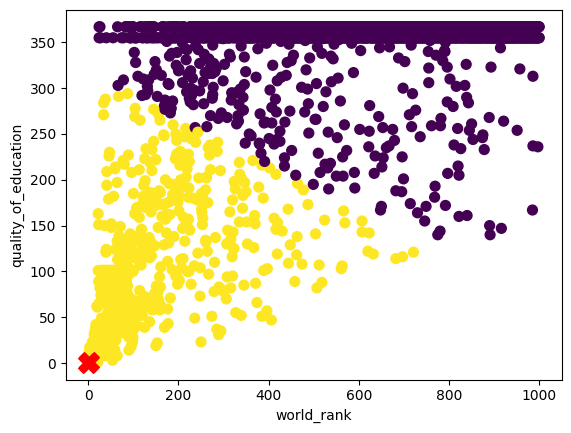

In [35]:
from matplotlib import pyplot as plt
plt.scatter(df["world_rank"], df["quality_of_education"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('world_rank')
plt.ylabel('quality_of_education')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

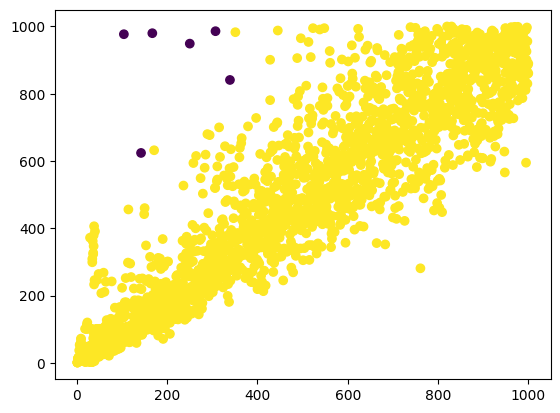

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

dataX = df[["world_rank","publications"]]

x_scaler = StandardScaler().fit_transform(dataX)

dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# -1 == выбросы
labels = dbscan.labels_

# темные точки == выбросы
plt.scatter(dataX.to_numpy()[:, 0], dataX.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [60]:
# иерархическая кластеризация
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *

data_dist = pdist(X, 'euclidean')
data_linkage = linkage(data_dist, method='average')

clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [64]:
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res

,world_rank,quality_of_education,Количество
I,,,
1,797.005277,344.930079,758
2,282.226075,238.393897,1442


In [62]:
df[df['I']==1]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,KMeans,I
366,167,Mines ParisTech,France,6,249,31,165,980,825,609,917.0,737,48.81,2014,1,1
506,307,Wesleyan University,USA,117,130,54,210,986,538,609,832.0,737,46.30,2014,1,1
538,339,Yokohama National University,Japan,16,52,135,126,841,812,609,749.0,338,45.97,2014,1,1
596,397,Cranfield University,United Kingdom,35,355,71,210,728,731,800,769.0,737,45.56,2014,1,1
627,428,Sogang University,South Korea,14,355,478,210,781,792,800,889.0,68,45.43,2014,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015,2,1
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015,2,1
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015,2,1
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015,2,1


In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

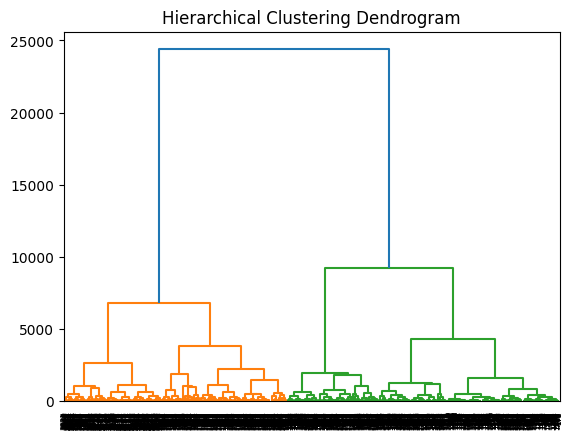

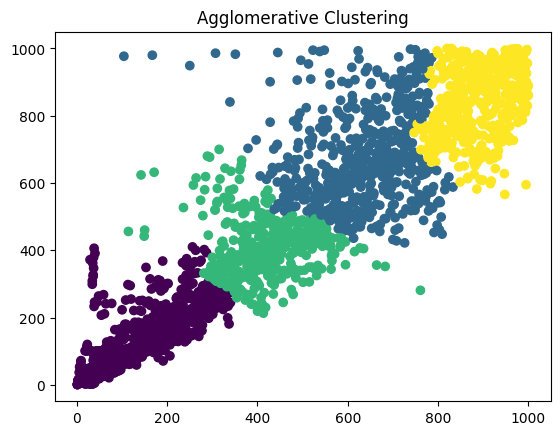

In [63]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# дендрограмма
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - грaфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here